In [ ]:
import numpy as np
import pandas as pd

# Exploration Data Analysis

Tahap ini akan dilakukan eksplorasi data dengan tujuan untuk mengetahui informasi data data yang dimiliki. Tahapan ini menjadi sangat penting karena berdasarkan informasi yang kita peroleh dapat menjadi pondasi untuk melakukan data preprocessing dan menentukan model untuk pengelompokkan data.


In [ ]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tahap ini bertujuan untuk membaca data yang akan diproses. Tahapan ini merupakan tahap awal untuk menuju proses berikutnya serta Tahap ini akan memperoleh isi data yang telah diinputkan. Tujuannya adalah untuk mengetahui bagaimana data yang akan digunakan.
Dari data tersebut dapat dilihat nama fitur-fitur yang ada pada dataset tersebut. Terdapat kolom date pada fiturnya sehingga akan dilakukan proses pembagian menjadi subbagian periodik yaitu tahun, bulan, dan hari.

In [ ]:
df['Date']= pd.to_datetime(df["Date"])
df['year'] = df.Date.dt.year


def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

df['month'] = df.Date.dt.month
df = encode(df, 'month', 12)

df['day'] = df.Date.dt.day
df = encode(df, 'day', 31)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Pada tahap ini dilakukan proses menyandikan tanggal dengan tepat, yaitu bulan dan hari dalam fitur. karena, tanggal dan waktu itu bersifat siklus. sehingga proses ini memberitahu model ANN bahwa suatu fitur bersifat siklis dan terbagi menjadi subbagian periodik yaitu tahun, bulan, dan hari. untuk setiap subbagian dibuat mfitur baru dengan mentransformasikan sinus dan kosinus dari fitur subbagian.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Tahap ini bertujuan untuk melihat info tipe data dan non-null dari data yang diinputkan. Dari hasil tersebut dapat diketahui bahwa terdapat missing data dan juga tipe data dengan tipe data object serta numerik

In [ ]:
categorical = (df.dtypes == "object")
object_cols = list(categorical[categorical].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Pada tahap ini dilakukan proses untuk memisahkan fitur mana saja yang memiliki tipe data object dari fitur secara keseluruhan.

In [ ]:
for i in object_cols:
    print(i, df[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


Tahap ini bertujuan untuk melihat berapa banyak data yang bernilai null pada fitur yang bertipe data object sehingga nantinya akan dilakukan proses pembersihan data sehingga data null tersebut sudah tidak ada.

In [ ]:
for i in object_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)
for i in object_cols:
    print(i, df[i].isnull().sum())

Location 0
WindGustDir 0
WindDir9am 0
WindDir3pm 0
RainToday 0
RainTomorrow 0


Tahap ini bertujuan untuk mengisi nilai bernilai null pada kolom dengan tipe data object, nilai bernilai null tersebut diisi atau digantikan oleh mode kolom dalam nilai. Dan hasilnya ditampilkan dan terbukti bahwa untuk fitur dengan tipe data object telah dibersihkan dari data null.

In [ ]:
numeric = (df.dtypes == "float64")
num_cols = list(numeric[numeric].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


Pada tahap ini dilakukan proses untuk memisahkan fitur mana saja yang memiliki tipe data float dari fitur secara keseluruhan.

In [ ]:
for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


Tahap ini bertujuan untuk melihat berapa banyak data yang bernilai null pada fitur yang bertipe data float sehingga nantinya akan dilakukan proses pembersihan data sehingga data null tersebut sudah tidak ada.

In [ ]:
for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)
for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
month_sin 0
month_cos 0
day_sin 0
day_cos 0


Tahap ini bertujuan untuk mengisi nilai bernilai null pada kolom dengan tipe data float, nilai bernilai null tersebut diisi atau digantikan oleh nilai median kolom. Dan hasilnya ditampilkan dan terbukti bahwa untuk fitur dengan tipe data float telah dibersihkan dari data null.

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,month_sin,month_cos,day,day_sin,day_cos
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,1.454600e+05,1.454600e+05,145460.000000,1.454600e+05,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916,2012.769751,6.399615,1.158393e-02,-1.635591e-02,15.712258,2.281439e-03,-0.019380
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658,2.537684,3.427262,7.052668e-01,7.086635e-01,8.794789,7.134009e-01,0.700489
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000,-9.987165e-01,-0.994869
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,-5.000000e-01,-8.660254e-01,8.000000,-7.247928e-01,-0.758758
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,1.224647e-16,-1.836970e-16,16.000000,-2.449294e-16,-0.050649
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,5.000000e-01,5.000000e-01,23.000000,7.247928e-01,0.688967
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,1.000000e+00,1.000000e+00,31.000000,9.987165e-01,1.000000


Tahap ini bertujuan untuk melihat deskripsi data atau melihat distribusi data dari keseluruhan kolom mulai dari count, nilai mean, std, min, 25%, 50%,75%, dan max.

In [ ]:
import seaborn as sns

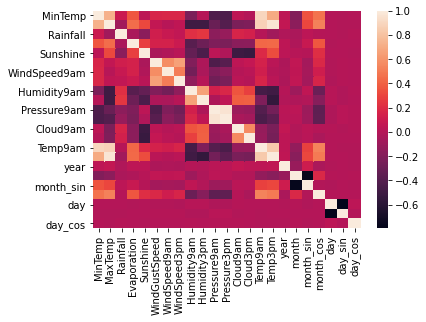

In [ ]:
sns.heatmap(df.corr())

Tahap ini bertujuan untuk melihat hubungan antar fitur yang terkait erat. Fitur yang memiliki korelasi data mendekati 1 memiliki hubungan korelasi positif yang sangat kuat dan mendekati -1 korelasi negatif yang sangat kuat yang menandakan bahwa fitur tersebut mempengaruhi satu sama lain.  Untuk fitur yang memiliki korelasi data yang mendekati 0 maka fitur tersebut memiliki korelasi yang sangat lemah.

# Data Preprocessing

Tahap ini merupakan tahap preprocessing data, artinya menyiapkan data sebelum diproses sehingga data tersebut telah siap untuk digunakan. Preprocessing data yang akan dilakukan saat ini adalah:
Beri label kolom pengkodean pada data kategori,
Penskalaan fitur,
Mendeteksi outlier,
Menghapus outlier berdasarkan analisis data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

Tahap ini dilakukan proses label encoding dengan tujuan untuk mengonversi label kata menjadi angka. label encoding ini mengacu pada proses transformasi label kata menjadi bentuk numerik sehingga dapat dilihat sudah tidak ada lagi fitur yang memiliki tipe data object.

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Tahap ini bertujuan untuk menampilkan data setelah dilakukan prose label encoding, dari data tersebut perlu dilakukan standardisasi data karena terdapat beberapa kolom yang memiliki skala berbeda.

In [ ]:
features = df.drop(['RainTomorrow', 'Date','day', 'month'], axis=1)

target = df['RainTomorrow']

col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

Tahap ini melakukan proses untuk memisahkan features kolom dan target. features kolom merupakan feature yang akan menjadikan acuan memprediksi suatu target. Tahap ini juga terdapat proses menghapus fitur seperti date, day, dan month hal ini dikarenakan sudah tidak diperlukan lagi fitur tersebut, karena fitur date telah terbagi menjadi year, day, dan month kemudian fitur day dan month telah didapatkan nilai kosinus dan sinus dari masing masing fitur. Dari fitur yang telah dianalisa tadi terdapat perbedaan skala antar fitur sehingga perlu dilakukan proses standarisasi sehingga fitur tersebut memiliki skala yang sama saat pembuatan model.

In [ ]:
import matplotlib.pyplot as plt

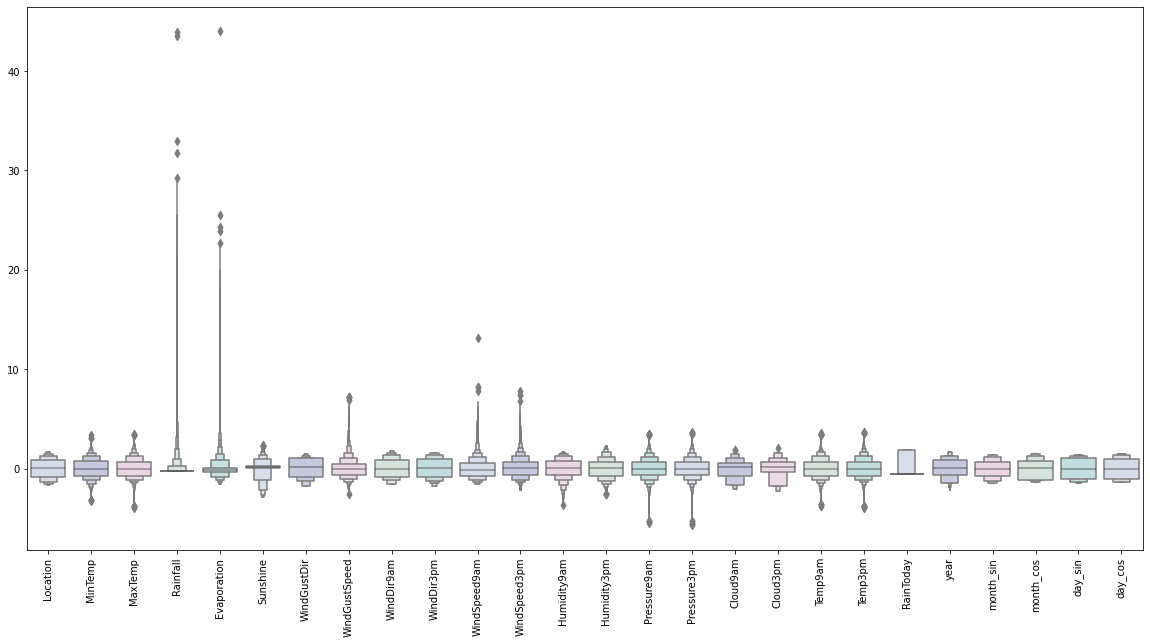

In [ ]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Tahap ini merupakan tahap proses melihat outlier pada data. Outlier merupakan suatu observasi pada kumpulan data yang berbeda polanya atau nilainya dari observasi-observasi lainya pada kumpulan data. Outlier berpengaruh pada pegambilan kesimpulan penelitian sehingga bisa menyebabkan pengujian diluar yang seharusnya. Sehingga outlier ini harus di atasi.

In [ ]:
features["RainTomorrow"] = target

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

Tahap ini merupakan tahap untuk menghapus atau menghilangkan outlier dengan cara menseleksi kumpulan data dan mengabaikan data ekstreme(outlier) seperti yang terlihat.

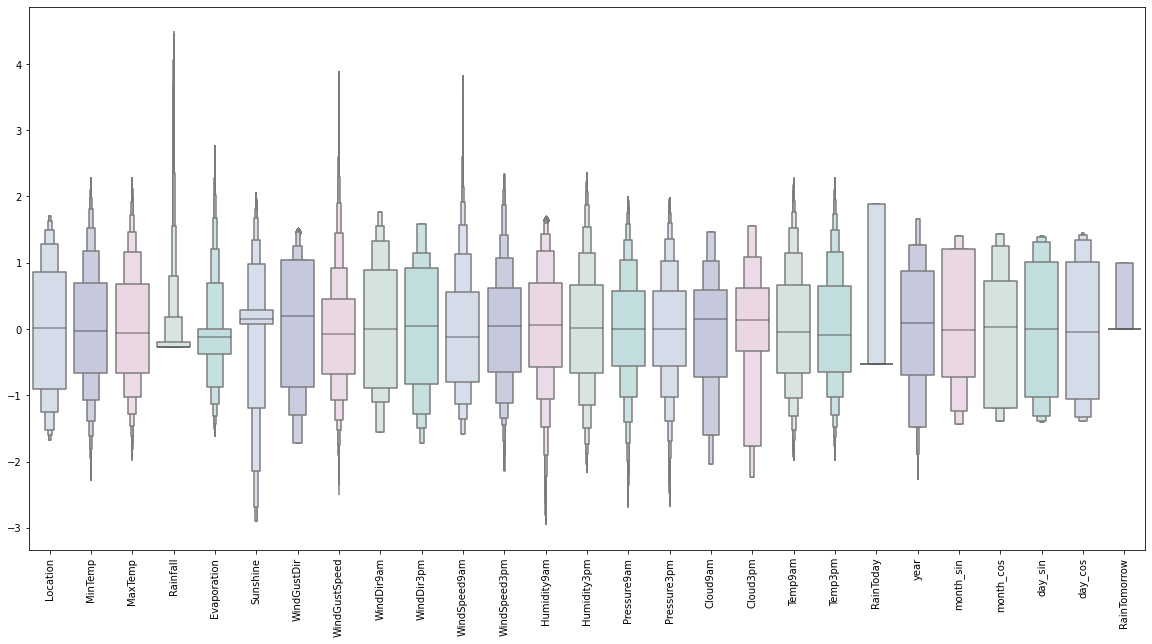

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Tahap ini menampilkan hasil setelah proses menghapus outlier, dapat dilihat outlier sudah tidak ada dan menandakan bahwa data siap digunakan.

# Model Building

Tahap ini merupakan tahap memproses data yaitu membuat model ANN dan melakukan training data serta menampilkan akurasi dan hasilnya.

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

Sebelum melakukan training data, pembuatan model, dan mendapatkan akurasinya, maka perlu dilakukan pembagian data untuk data train dan data testing baik dari data features maupun target. Proses pembagian data dilakukan dengan menggunakan library train test split dengan rasio perbandingan 80% data train dan 20% data test.

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.84):
      print("\nAkurasi model telah lebih dari 84%")
      self.model.stop_training = True
callbacks = myCallback()

Fungsi ini merupakan fungsi callbacks dari library tensorflow, dimana fungsi ini memiliki tujuan untuk menghentikan proses pengujian pada akurasi tertentu sehingga proses pengujian tidak terlalu lama. Proses ini memperlihatkan bahwa ketika akurasi telah didapatkan lebih dari atau sama dengan 84% proses training akan berhenti

In [ ]:
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Tahap ini merupakan pembuatan model ANN. Dimana model yang digunakan adalah model sequential. Kemudian membuat layers, dimana Model mengharapkan deretan data dengan 26 variabel (argumen input_dim = 26), Lapisan hidden pertama memiliki 32 node dan menggunakan fungsi aktivasi relu, Lapisan hidden kedua memiliki 32 node dan menggunakan fungsi aktivasi relu, Lapisan hidden ketiga memiliki 16 node dan menggunakan fungsi aktivasi relu. Sebelum masuk ke Lapisan ke empat dilakukan proses dropout sebesar 0.25 untuk mencegah terjadinya overfitting, seperti yang dijelaskan dalam makalah hinton digunakan pada masing-masing lapisan (padat) yang terhubung sepenuhnya sebelum output. Lapisan keempat memiliki 8 node dan fungsi aktivasi relu. Kemudian dilakukan kembali proses dropout sebesar 0.5. Dan lapisan terakhir atau lapisan output memiliki 1 node dengan fungsi aktivasi sigmoid.

In [ ]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Tahap ini merupakan tahap compile keras model, dimana optimizer adam digunakan dengan tujuan mencapai hasil yang baik dengan cepat. Kemudian digunakan binary crossentropy digunakan karena target dari data tersebut merupakan bilangan biner yaitu 0 dan 1.

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks = [callbacks], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 20s 2ms/step - loss: 0.4466 - accuracy: 0.8083 - val_loss: 0.3650 - val_accuracy: 0.8429
Epoch 2/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3897 - accuracy: 0.8290 - val_loss: 0.3617 - val_accuracy: 0.8403
Epoch 3/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3872 - accuracy: 0.8297 - val_loss: 0.3605 - val_accuracy: 0.8398
Epoch 4/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3844 - accuracy: 0.8282 - val_loss: 0.3622 - val_accuracy: 0.8399
Epoch 5/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3836 - accuracy: 0.8308 - val_loss: 0.3602 - val_accuracy: 0.8400
Epoch 6/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3839 - accuracy: 0.8288 - val_loss: 0.3553 - val_accuracy: 0.8440
Epoch 7/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3785 - accuracy: 0.8303 - val_loss: 0.3527 - val_a

Tahap ini merupakan tahap training data dengan perintah fit, dimana parameter dari training data ini adalah features train dan target train, kemudian epochs yang berfungsi sebagai batas train yang dilakukan.

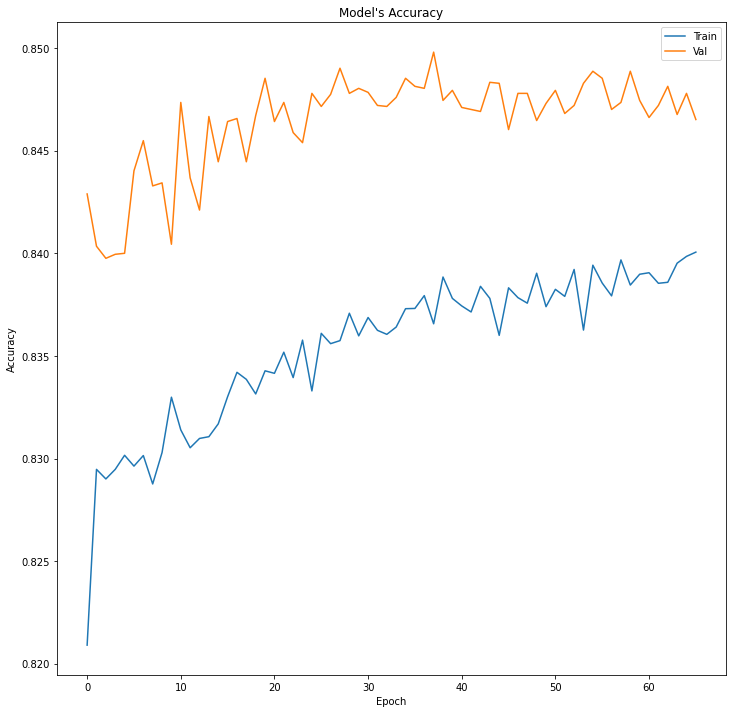

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model\'s Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

Tahap ini menampilkan akurasi dan validasi akurasi dari hasil training data dalam bentuk grafik.

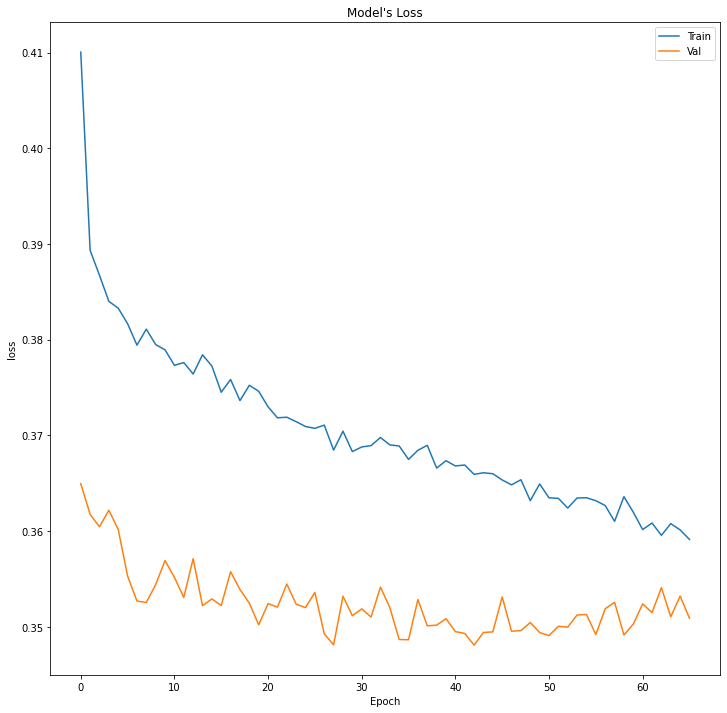

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model\'s Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

Tahap ini menampilkan loss dan validasi loss dari hasil training data dalam bentuk grafik.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Tahap ini berfungsi untuk melakukan prediksi terhadap data tes, dan yang melakukan prediksi adalah model yang telah ditraining sebelumnya.

In [ ]:
from sklearn.metrics import confusion_matrix

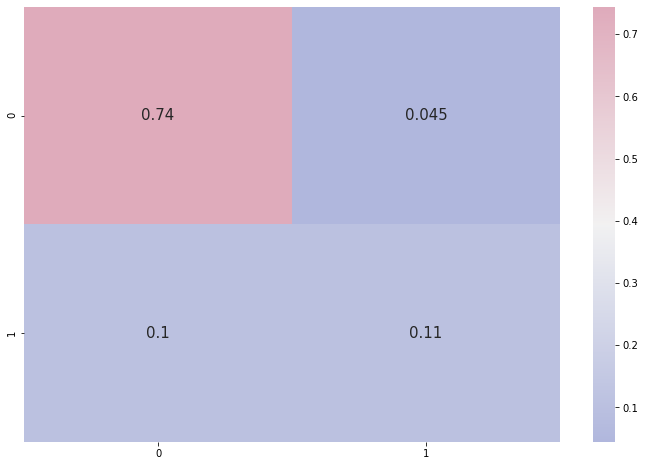

In [ ]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

Tahap ini merupakan tahap confusion matrix untuk melihat seberapa banyak data berhasil ditebak dengan benar dan salah.